In [1]:
# Recreate an illustrative "adiabatic evolution on eigenenergy landscape" plot
# - Pure matplotlib, no seaborn, no custom color settings (defaults only)
# - Written for a Jupyter cell; saves PNG and SVG for export

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon
from matplotlib.patheffects import withStroke



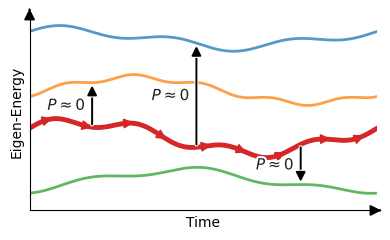

In [2]:
# Transition arrows from the tracked path to the other eigenenergy levels

# Time axis
t = np.linspace(0, 1, 400)

# Toy eigenenergy bands (just smooth curves)
bands = [
    2.2 + 0.10*np.sin(2*np.pi*(t+0.15)) + 0.05*np.sin(6*np.pi*t),
    1.6 + 0.15*np.sin(2*np.pi*(t-0.05)) - 0.03*np.cos(10*np.pi*t),
    1.05 + 0.18*np.sin(2*np.pi*(t+0.10)) + 0.06*np.sin(8*np.pi*t),
    0.55 + 0.12*np.sin(2*np.pi*(t-0.18)) - 0.04*np.cos(6*np.pi*t),
]

# "Adiabatic path" that tracks the 3rd band with small avoided-crossing-like dip
path = bands[2].copy()
dip_center = 0.62


fig, ax = plt.subplots(figsize=(4, 2.5))
FIG_INTRO = fig  # keep a handle for downstream export cells

# Plot eigenenergy bands
for idx, y in enumerate(bands):
    if idx == 2:
        continue  # skip the tracked band so only the highlighted path remains
    ax.plot(t, y, lw=2, alpha=0.75)

# Plot the followed eigenstate path with slightly thicker line
(path_line,) = ax.plot(t, path, lw=3.5)
path_color = path_line.get_color()


def add_path_arrow(tau: float, *, length: float = 0.07) -> None:
    """Place a short arrow tangent to the followed path at time ``tau``."""

    idx = np.searchsorted(t, tau)
    idx = np.clip(idx, 1, t.size - 2)
    dt = t[idx + 1] - t[idx - 1]
    dy = path[idx + 1] - path[idx - 1]
    norm = np.hypot(dt, dy)
    if norm == 0.0:
        return
    direction = np.array([dt, dy]) / norm
    start = np.array([t[idx], path[idx]]) - 0.5 * length * direction
    end = start + length * direction
    arrow = FancyArrowPatch(
        tuple(start),
        tuple(end),
        arrowstyle="-|>",
        mutation_scale=14,
        lw=1.4,
        color=path_color,
        zorder=1,
    )
    arrow.set_path_effects([withStroke(linewidth=3, foreground="white")])
    ax.add_patch(arrow)


def interp_curve(curve: np.ndarray, tau: float) -> float:
    """Return the value of ``curve`` at a fractional time ``tau`` using linear interp."""

    return float(np.interp(tau, t, curve))


def transition_arrow(
    tau: float,
    target_curve: np.ndarray,
    label: str,
    *,
    text_align: str = "left",
    color: str = "#000000",
) -> None:
    """Draw a single-headed arrow pointing from the tracked path to ``target_curve``."""

    y_start = interp_curve(path, tau)
    y_end = interp_curve(target_curve, tau)
    arrow = FancyArrowPatch(
        (tau, y_start),
        (tau, y_end),
        arrowstyle="-|>",
        mutation_scale=14,
        lw=1.4,
        color=color,
        zorder=6,
    )
    arrow.set_path_effects([withStroke(linewidth=3, foreground="white")])
    ax.add_patch(arrow)

    offset = 0.018 if text_align == "left" else -0.018
    ha = "left" if text_align == "left" else "right"
    ax.text(
        tau + offset,
        0.5 * (y_start + y_end),
        label,
        ha=ha,
        va="center",
        fontsize=11,
        color="#222222",
        path_effects=[withStroke(linewidth=3, foreground="white")],
    )


arrow_times = np.linspace(0.05, 0.95, 9)
for tau in arrow_times:
    add_path_arrow(float(tau))

transition_specs = [
    (0.18, bands[1], r"$P \approx 0$", "right"),
    (0.48, bands[0], r"$P \approx 0$", "right"),
    (0.78, bands[3], r"$P \approx 0$", "right"),
]
for tau, target, label, align in transition_specs:
    transition_arrow(tau, target, label, text_align=align)

# Labels and axes styling
ax.set_xlabel("Time")
ax.set_ylabel("Eigen-Energy")
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.2, 2.5)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
axis_arrow_style = dict(arrowstyle="-|>", mutation_scale=16, lw=1.3, color="#000000")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate("", xy=(x1 + 0.02 * (x1 - x0), y0), xytext=(x1, y0),
            xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax.annotate("", xy=(x0, y1 + 0.02 * (y1 - y0)), xytext=(x0, y1),
            xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
plt.tight_layout()
plt.show()


In [3]:
from pathlib import Path

if "FIG_INTRO" not in globals():
    raise RuntimeError("Run the plotting cell first to populate FIG_INTRO.")

fig = FIG_INTRO
fig.canvas.draw()  # ensure the canvas is populated before exporting

output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/introduction")
png_path = output_dir / "adiabatic_path_following.png"
svg_path = output_dir / "adiabatic_path_following.svg"
pdf_path = output_dir / "adiabatic_path_following.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")


Saved /home/yehon/projects/grape-crab-qoc/results/introduction/adiabatic_path_following.png, /home/yehon/projects/grape-crab-qoc/results/introduction/adiabatic_path_following.svg, and /home/yehon/projects/grape-crab-qoc/results/introduction/adiabatic_path_following.pdf


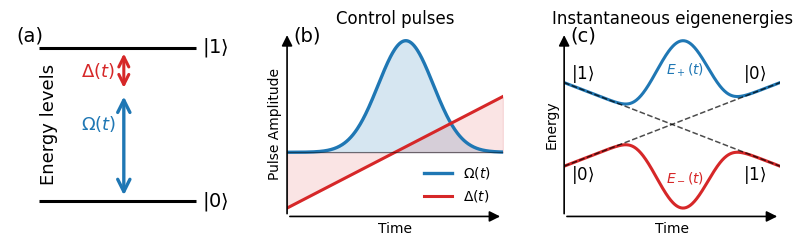

In [4]:
# Rapid adiabatic passage schematic
from matplotlib.patches import FancyArrowPatch, Polygon

rap_t = np.linspace(0.0, 1.0, 400)
rap_omega =  np.exp(-((rap_t - 0.55) / 0.18) ** 2)
rap_delta =  (rap_t - 0.5)
rap_gap = np.sqrt((rap_delta) ** 2 + (rap_omega) ** 2)
rap_E_plus = 0.5 * rap_gap
rap_E_minus = -0.5 * rap_gap

fig, axes = plt.subplots(1, 3, figsize=(8, 2.56))
FIG_RAP = fig
ax_levels, ax_pulses, ax_gap = axes
axis_arrow_style = dict(arrowstyle="-|>", mutation_scale=16, lw=1.2, color="#000000")

# Left panel: level diagram with coupling arrows
ax_levels.hlines([0.0, 1.0], 0.15, 0.95, color='black', lw=2.2)
ax_levels.text(0.98, 1.0, r'$|1\rangle$', va='center', ha='left', fontsize=14)
ax_levels.text(0.98, 0.0, r'$|0\rangle$', va='center', ha='left', fontsize=14)

omega_arrow = FancyArrowPatch((0.58, 0.02), (0.58, 0.7), arrowstyle='<->', mutation_scale=22,
                               lw=2.4, color='#1f77b4', zorder=3)
ax_levels.add_patch(omega_arrow)
ax_levels.text(0.45, 0.50, r'$\Omega(t)$', ha='center', va='center', color='#1f77b4', fontsize=13)

delta_arrow = FancyArrowPatch((0.58, 0.72), (0.58, 0.98), arrowstyle='<->', mutation_scale=18,
                               lw=2.2, color='#d62728', zorder=3)
ax_levels.add_patch(delta_arrow)

ax_levels.text(0.45, 0.85, r'$\Delta(t)$', ha='center', va='center', color='#d62728', fontsize=13)
ax_levels.text(0.20, 0.5, 'Energy levels', ha='center', va='center',rotation=90,color='black', fontsize=13)
ax_levels.set_xlim(0.0, 1.1)
ax_levels.set_ylim(-0.1, 1.1)
ax_levels.set_xticks([])
ax_levels.set_yticks([])
ax_levels.axis('off')

# Middle panel: control amplitudes
ax_pulses.plot(rap_t, rap_omega, color='#1f77b4', lw=2.4, label=r'$\Omega(t)$')
ax_pulses.fill_between(rap_t, rap_omega, color='#1f77b4', alpha=0.18)
ax_pulses.plot(rap_t, rap_delta, color='#d62728', lw=2.2, label=r'$\Delta(t)$')
ax_pulses.fill_between(rap_t, rap_delta, color='#d62728', alpha=0.12)
ax_pulses.axhline(0.0, color='black', lw=0.8, alpha=0.45)
ax_pulses.set_xlabel('Time')
ax_pulses.set_ylabel('Pulse Amplitude')
ax_pulses.set_title('Control pulses')
ax_pulses.legend(frameon=False, loc='lower right')
ax_pulses.grid(False)
ax_pulses.spines["top"].set_visible(False)
ax_pulses.spines["right"].set_visible(False)
ax_pulses.spines["left"].set_visible(False)
ax_pulses.spines["bottom"].set_visible(False)
ax_pulses.set_xticks([])
ax_pulses.set_yticks([])
ax_pulses.set_xlim(rap_t[0], rap_t[-1])
x0_p, x1_p = ax_pulses.get_xlim()
y0_p, y1_p = ax_pulses.get_ylim()
ax_pulses.annotate("", xy=(x1_p , y0_p), xytext=(x0_p, y0_p),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax_pulses.annotate("", xy=(x0_p, y1_p), xytext=(x0_p, y0_p),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
# Right panel: adiabatic energies and gap
ax_gap.plot(rap_t, rap_E_plus, color='#1f77b4', lw=2.2, label=r'$E_+(t)$')
ax_gap.plot(rap_t, rap_E_minus, color='#d62728', lw=2.2, label=r'$E_-(t)$')
ax_gap.plot(rap_t, 0.5 * rap_delta, color='black', ls='--', lw=1.1, alpha=0.7)
ax_gap.plot(rap_t, -0.5 * rap_delta, color='black', ls='--', lw=1.1, alpha=0.7)
ax_gap.set_xlabel('Time')
ax_gap.set_ylabel('Energy')
ax_gap.set_title('Instantaneous eigenenergies')
ax_gap.text(0.03, 0.3, r'$|1\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.03, -0.3, r'$|0\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.83, -0.3, r'$|1\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.83, 0.3, r'$|0\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.47, 0.3,r'$E_+(t)$',color='#1f77b4')
ax_gap.text(0.47, -0.35,r'$E_-(t)$',color='#d62728')
ax_gap.grid(False)
ax_gap.spines["top"].set_visible(False)
ax_gap.spines["right"].set_visible(False)
ax_gap.spines["left"].set_visible(False)
ax_gap.spines["bottom"].set_visible(False)
ax_gap.set_xticks([])
ax_gap.set_yticks([])
ax_gap.set_xlim(rap_t[0], rap_t[-1])
x0_g, x1_g = ax_gap.get_xlim()
y0_g, y1_g = ax_gap.get_ylim()
ax_gap.annotate("", xy=(x1_g, y0_g), xytext=(x0_g, y0_g),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax_gap.annotate("", xy=(x0_g, y1_g), xytext=(x0_g, y0_g),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)

ax_levels.text(0.03, 0.95, '(a)', fontsize=14, transform=ax_levels.transAxes)
ax_pulses.text(0.03, 0.95, '(b)', fontsize=14, transform=ax_pulses.transAxes)
ax_gap.text(0.03, 0.95, '(c)', fontsize=14, transform=ax_gap.transAxes)
plt.tight_layout(w_pad=2.5)
plt.show()


In [5]:
from pathlib import Path

if "FIG_RAP" not in globals():
    raise RuntimeError("Run the rapid adiabatic passage schematic cell first.")

fig = FIG_RAP
fig.canvas.draw()
output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/introduction")
png_path = output_dir / "rapid_adiabatic_passage.png"
svg_path = output_dir / "rapid_adiabatic_passage.svg"
pdf_path = output_dir / "rapid_adiabatic_passage.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")


Saved /home/yehon/projects/grape-crab-qoc/results/introduction/rapid_adiabatic_passage.png, /home/yehon/projects/grape-crab-qoc/results/introduction/rapid_adiabatic_passage.svg, and /home/yehon/projects/grape-crab-qoc/results/introduction/rapid_adiabatic_passage.pdf


### GRAPE pulse refinement

The GRadient Ascent Pulse Engineering (GRAPE) algorithm treats the control field as a sequence of piecewise-constant bins. At each iteration the gradient information updates the bins upward or downward, refining the full pulse envelope while keeping the time step $\Delta t$ fixed.

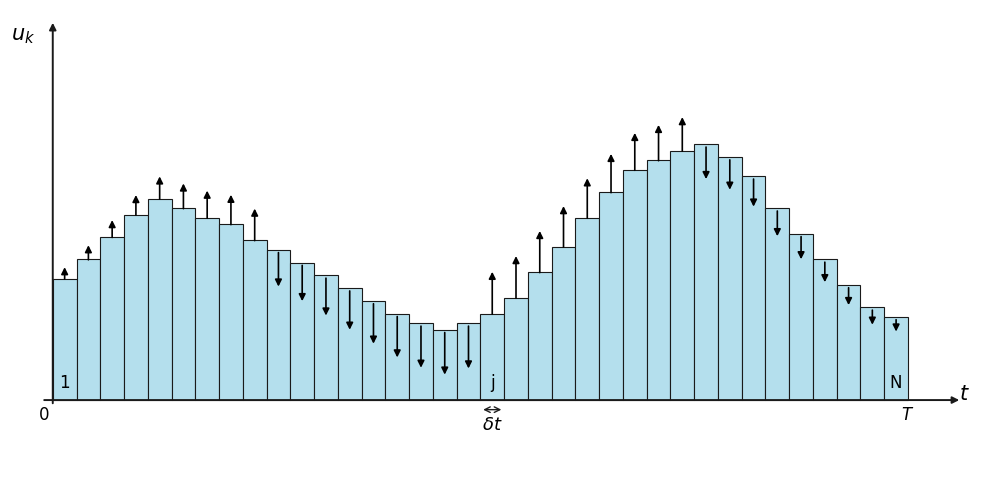

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the piecewise-constant control updates in GRAPE
amps = np.array([
    0.38, 0.44, 0.51, 0.58, 0.63, 0.60, 0.57, 0.55, 0.50, 0.47,
    0.43, 0.39, 0.35, 0.31, 0.27, 0.24, 0.22, 0.24, 0.27, 0.32,
    0.40, 0.48, 0.57, 0.65, 0.72, 0.75, 0.78, 0.80, 0.76, 0.70,
    0.60, 0.52, 0.44, 0.36, 0.29, 0.26
])
directions = np.sign(np.sin(np.linspace(0, 4 * np.pi, len(amps))))

n_bins = len(amps)
width = 1.0 / n_bins
edges = np.linspace(0.0, 1.0, n_bins, endpoint=False)
fig, ax = plt.subplots(figsize=(10, 5))
FIG_GRAPE_PULSE = fig
fig.patch.set_facecolor('white')
ax.set_facecolor("#ffffff")

norm = (amps - amps.min()) / (amps.max() - amps.min())
bar_colors = plt.cm.viridis(0.2 + 0.6 * norm)
ax.bar(
    edges,
    amps,
    width=width,
    align='edge',
    color="#b4dfed",
    edgecolor='#1a1a1a',
    linewidth=0.8
)

for idx, (amp, direction) in enumerate(zip(amps, directions)):
    x_center = edges[idx] + 0.5 * width
    if direction >= 0:
        start_y = amp - 0.01
        end_y = start_y  + np.sin(np.pi * (idx + 0.5) / n_bins) * 0.1 + 0.05
        arrow_color = "#000000"
    else:
        start_y = amp 
        end_y = start_y  - np.sin(np.pi * (idx + 0.5) / n_bins) * 0.1 - 0.05
        arrow_color = "#000000"
    ax.annotate(
        '',
        xy=(x_center, end_y),
        xytext=(x_center, start_y),
        arrowprops=dict(arrowstyle='-|>', color=arrow_color, linewidth=1.2)
    )

axis_style = dict(arrowstyle='-|>', color='#1a1a1a', linewidth=1.4, shrinkA=0, shrinkB=0)
ax.annotate('', xy=(1.06, 0.0), xytext=(-0.01, 0.0), arrowprops=axis_style)
ax.annotate('', xy=(0.0, 1.18), xytext=(0.0, -0.01), arrowprops=axis_style)

ax.text(1.06, 0.02, r'$t$', ha='left', va='center', fontsize=15)
ax.text(-0.02, 1.14, r'$u_k$', ha='right', va='center', fontsize=15)
ax.text(1.0, -0.02, r'$T$', ha='center', va='top', fontsize=12)
ax.text(-0.01, -0.02, r'$0$', ha='center', va='top', fontsize=12)

first_center = edges[0] + 0.5 * width
mid_index = 18
last_center = edges[-1] + 0.5 * width
ax.text(first_center, 0.08, '1', ha='center', va='top', fontsize=12)
ax.text(edges[mid_index] + 0.5 * width, 0.08, 'j', ha='center', va='top', fontsize=12)
ax.text(last_center, 0.08, 'N', ha='center', va='top', fontsize=12)

ax.annotate(
    '',
    xy=(edges[mid_index], -0.03),
    xytext=(edges[mid_index] + width, -0.03),
    arrowprops=dict(arrowstyle='<->', color='#1f1f1f', linewidth=1.0)
)
ax.text(edges[mid_index] + 0.5 * width, -0.05, r'$\delta t$', ha='center', va='top', fontsize=13)

ax.set_xlim(-0.05, 1.08)
ax.set_ylim(-0.25, 1.22)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

ax.margins(x=0)
plt.tight_layout()
plt.show()


In [13]:
# save GRAPE pulse refinement figure 

if "FIG_GRAPE_PULSE" not in globals():
    raise RuntimeError("Run the GRAPE pulse refinement cell first.")

fig = FIG_GRAPE_PULSE
fig.canvas.draw()
output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/introduction")
png_path = output_dir / "grape_pulse_refinement.png"
svg_path = output_dir / "grape_pulse_refinement.svg"
pdf_path = output_dir / "grape_pulse_refinement.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")


Saved /home/yehon/projects/grape-crab-qoc/results/introduction/grape_pulse_refinement.png, /home/yehon/projects/grape-crab-qoc/results/introduction/grape_pulse_refinement.svg, and /home/yehon/projects/grape-crab-qoc/results/introduction/grape_pulse_refinement.pdf


### CMA-ES optimization loop

The Covariance Matrix Adaptation Evolution Strategy (CMA-ES) repeatedly refines a Gaussian search distribution by sampling candidate solutions, ranking them by fitness, and adapting the distribution parameters. The schematic below outlines a single iteration of the procedure:

1. Draw a population of candidates from the current multivariate Gaussian.
2. Evaluate each candidate with the objective function and rank by performance.
3. Update the covariance matrix to capture successful search directions.
4. Move the distribution mean toward the weighted elite set.
5. Adapt the global step size (sampling radius).
6. Resample candidates from the updated distribution for the next generation.

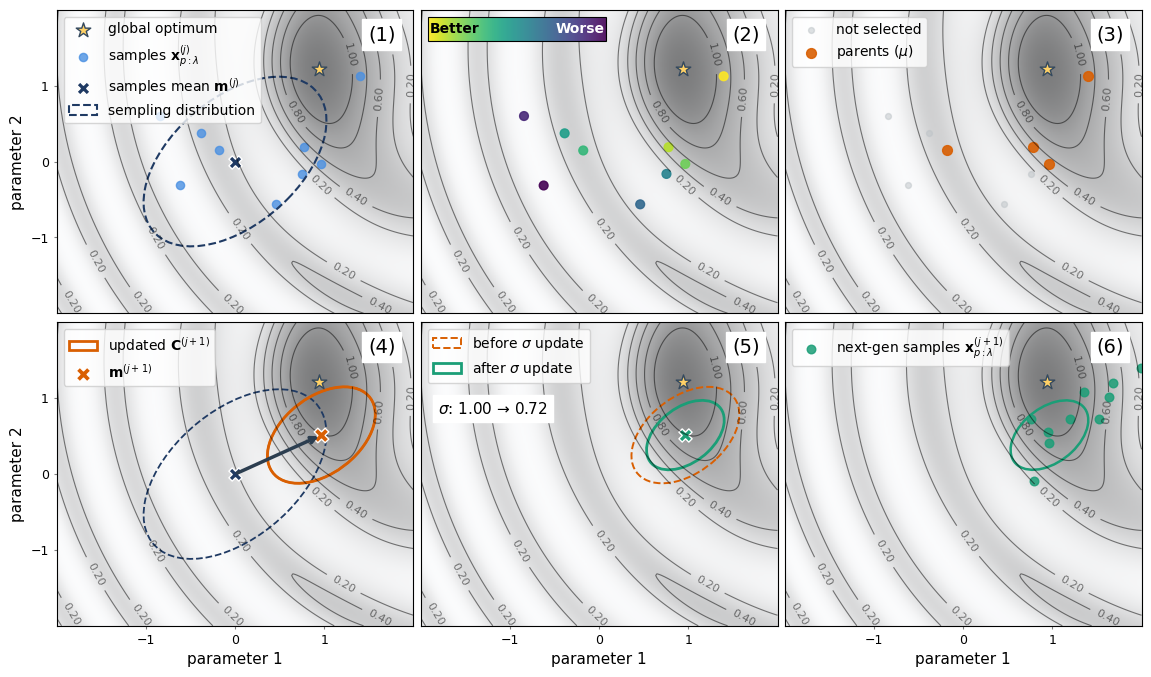

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def draw_covariance_ellipse(ax, mean, cov, n_std=1.0, **kwargs):
    """Add an ellipse showing the given covariance on the axis."""
    vals, vecs = np.linalg.eigh(cov)
    order = np.argsort(vals)[::-1]
    vals, vecs = vals[order], vecs[:, order]
    width, height = 2 * n_std * np.sqrt(vals)
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)
    return ellipse


def add_contours(ax, func, bounds, levels=None):
    """Draw contour lines for the objective function on the provided axis."""
    x_min, x_max, y_min, y_max = bounds
    x = np.linspace(x_min, x_max, 200)
    y = np.linspace(y_min, y_max, 200)
    xx, yy = np.meshgrid(x, y)
    zz = func(xx, yy)
    CS = ax.contour(xx, yy, zz, levels=levels, colors="#000000", linewidths=0.8, alpha=0.5)
    ax.clabel(CS, fontsize=8, fmt="%.2f")
    ax.imshow(zz, extent=bounds, origin="lower", cmap="Greys", alpha=0.5, aspect='auto')


rng = np.random.default_rng(7)
initial_mean = np.array([0.0, 0.0])
initial_cov = np.array([[1.05, 0.55], [0.55, 1.25]])

# Target and objective definition
objective_target = np.array([1.1, 1.25])


def exp_func(x, y):
    return np.exp(-(x**2 + y**2))


def objective(x, y):
    x_var = (x - objective_target[0])
    y_var = (y - objective_target[1]) / 1.2
    return exp_func(x_var, y_var) - 0.3 * np.cos((x_var - 1.5)**2 + (y_var - 0.2)**2) + 0.2 * exp_func(x_var - 0.4, y_var + 2)


# Step 1: sample the initial population
population = rng.multivariate_normal(initial_mean, initial_cov, size=10)

# Step 2: evaluate objective and rank
values = objective(population[:, 0], population[:, 1])
order = np.argsort(-values)
ranks = np.empty_like(order)
ranks[order] = np.arange(len(order))

elite_count = 4
weights = np.linspace(elite_count, 1.0, elite_count)
weights /= weights.sum()
elite = population[order[:elite_count]]
weighted_mean = np.average(elite, axis=0, weights=weights)
centered_elite = elite - weighted_mean
new_cov = sum(w * np.outer(vec, vec) for w, vec in zip(weights, centered_elite))
new_cov += 0.15 * np.eye(2)

sigma_before = 1.0
sigma_after = 0.72
scaled_cov = new_cov * (sigma_after / sigma_before)**2
next_population = rng.multivariate_normal(weighted_mean, scaled_cov, size=10)

bounds = (-2, 2, -2, 2)
levels = np.linspace(0, 1.0, 6)[1:]

FIG_CMAES_SCHEMATIC, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax in axes:
    ax.set_facecolor("#f8f9fbff")
    ax.set_xlim(bounds[0], bounds[1])
    ax.set_ylim(bounds[2], bounds[3])
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(True)
    add_contours(ax, objective, bounds, levels=levels)
    if ax == axes[0]:
        ax.scatter(0.93766, 1.21565, s=120, marker='*', color='#ffd166', edgecolor='#34495e', linewidth=1.0, zorder=6, label='global optimum')
    else:
        ax.scatter(0.93766, 1.21565, s=120, marker='*', color='#ffd166', edgecolor='#34495e', linewidth=1.0, zorder=6)

label_11 = r'samples $\mathbf{x}_{p:\lambda}^{(j)}$'
label_12 = r'sempling distribution'
label_13 = r'samples mean $\mathbf{m}^{(j)}$'

# (1) Generate candidates
ax = axes[0]
ax.scatter(population[:, 0], population[:, 1], s=35, color='#4a90e2', alpha=0.8, label=label_11)
ax.scatter(*initial_mean, s=90, color='#1f3a63', marker='X', edgecolor='white', linewidth=1.0, label=label_13)
draw_covariance_ellipse(ax, initial_mean, initial_cov, edgecolor='#1f3a63', linestyle='--', linewidth=1.5, facecolor='none', label=label_12)
ax.text(0.95, 0.95, '(1)', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14, zorder=10, backgroundcolor="#ffffffff")
ax.legend(loc='upper left', frameon=True, fontsize=10, facecolor="#ffffffff")

# (2) Evaluate and rank
ax = axes[1]
scatter = ax.scatter(population[:, 0], population[:, 1], c=ranks, cmap='viridis_r', s=40, alpha=0.9)
cb_ax = inset_axes(ax, width="50%", height="8%", loc='upper left')
clb = plt.colorbar(scatter, cax=cb_ax, orientation='horizontal', ticks=[])
clb.ax.text(0.01, 0.5, 'Better', ha='left', va='center', fontsize=10, color='black', transform=clb.ax.transAxes, fontweight='bold')
clb.ax.text(0.99, 0.5, 'Worse', ha='right', va='center', fontsize=10, color='white', transform=clb.ax.transAxes, fontweight='bold')
clb.outline.set_visible(True)
ax.text(0.95, 0.95, '(2)', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14, zorder=10, backgroundcolor="#ffffffff")

# (3) Keep only the elites
ax = axes[2]
ax.scatter(population[:, 0], population[:, 1], s=18, color='#bdc3c7', alpha=0.5, label='not selected')
ax.scatter(elite[:, 0], elite[:, 1], s=50, color='#d95f02', alpha=0.9, label=r'parents ($\mu$)')
ax.text(0.95, 0.95, '(3)', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14, zorder=10, backgroundcolor="#ffffffff")
ax.legend(loc='upper left', frameon=True, fontsize=10, facecolor="#ffffffff")

# (4) Update covariance matrix and shift mean toward elites
ax = axes[3]
draw_covariance_ellipse(ax, initial_mean, initial_cov, edgecolor='#1f3a63', linestyle='--', linewidth=1.3, facecolor='none')
draw_covariance_ellipse(ax, weighted_mean, new_cov, edgecolor='#d95f02', linewidth=2.0, facecolor='none', label=r'updated $\mathbf{C}^{(j+1)}$')
ax.scatter(*initial_mean, s=90, color='#1f3a63', marker='X', edgecolor='white', linewidth=1.0, zorder=5)
ax.scatter(*weighted_mean, s=110, color='#d95f02', marker='X', edgecolor='white', linewidth=1.0, zorder=6, label=r'$\mathbf{m}^{(j+1)}$')
ax.annotate('', xy=weighted_mean, xytext=initial_mean, arrowprops=dict(arrowstyle='->', color='#2c3e50', linewidth=2.5), zorder=10)
draw_covariance_ellipse(ax, weighted_mean, new_cov, edgecolor='#d95f02', linewidth=1.6, facecolor='none')
ax.text(0.95, 0.95, '(4)', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14, zorder=10, backgroundcolor="#ffffffff")
ax.legend(loc='upper left', frameon=True, fontsize=10, facecolor="#ffffffff")

# (5) Update global step size
ax = axes[4]
draw_covariance_ellipse(ax, weighted_mean, new_cov, edgecolor='#d95f02', linestyle='--', linewidth=1.4, facecolor='none', label=r'before $\sigma$ update')
draw_covariance_ellipse(ax, weighted_mean, scaled_cov, edgecolor='#1b9e77', linewidth=2.0, facecolor='none', label=r'after $\sigma$ update')
ax.scatter(*weighted_mean, s=90, color='#1b9e77', marker='X', edgecolor='white', linewidth=1.0)
ax.text(0.95, 0.95, '(5)', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14, zorder=10, backgroundcolor="#ffffffff")
ax.text(0.05, 0.7, rf"$\sigma$: {sigma_before:.2f} → {sigma_after:.2f}", transform=ax.transAxes, fontsize=11, color="#000000", backgroundcolor="#ffffffff", zorder=5)
ax.legend(loc='upper left', frameon=True, fontsize=10, facecolor="#ffffffff")

# (6) Generate next population
ax = axes[5]
ax.scatter(next_population[:, 0], next_population[:, 1], s=38, color='#1b9e77', alpha=0.85, label=r'next-gen samples $\mathbf{x}_{p:\lambda}^{(j+1)}$')
draw_covariance_ellipse(ax, weighted_mean, scaled_cov, edgecolor='#1b9e77', linewidth=1.8, facecolor='none')
ax.legend(loc='upper left', frameon=True, fontsize=10, facecolor="#ffffffff")
ax.text(0.95, 0.95, '(6)', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14, zorder=10, backgroundcolor="#ffffffff")

for idx, ax in enumerate(axes):
    if idx in [0, 3]:
        ax.set_yticks([-1, 0, 1])
        ax.set_ylabel("parameter 2", fontsize=11)
    if idx in [3, 4, 5]:
        ax.set_xticks([-1, 0, 1])
        ax.set_xlabel("parameter 1", fontsize=11, labelpad=4)
    ax.tick_params(axis='both', which='both', length=2, labelsize=9, color='gray')

FIG_CMAES_SCHEMATIC.subplots_adjust(hspace=0.03, wspace=0.02)
plt.show()


In [9]:
#save CMA-ES schematic figure
if "FIG_CMAES_SCHEMATIC" not in globals():
    raise RuntimeError("Run the CMA-ES schematic cell first.")
fig = FIG_CMAES_SCHEMATIC
fig.canvas.draw()
output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/introduction")
png_path = output_dir / "cmaes_schematic.png"
svg_path = output_dir / "cmaes_schematic.svg"
pdf_path = output_dir / "cmaes_schematic.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")

Saved /home/yehon/projects/grape-crab-qoc/results/introduction/cmaes_schematic.png, /home/yehon/projects/grape-crab-qoc/results/introduction/cmaes_schematic.svg, and /home/yehon/projects/grape-crab-qoc/results/introduction/cmaes_schematic.pdf


### CMA-ES iteration snapshots

To complement the cycle schematic, this figure shows the CMA-ES search distribution at iterations 1, 2, 5, and 10 for the same non-convex objective.

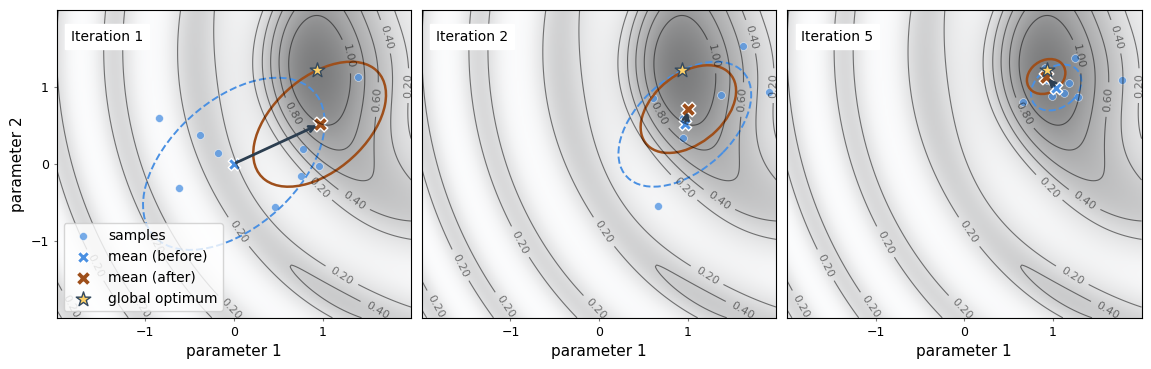

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def draw_covariance_ellipse(ax, mean, cov, n_std=1.0, **kwargs):
    """Add an ellipse showing the given covariance on the axis."""
    vals, vecs = np.linalg.eigh(cov)
    order = np.argsort(vals)[::-1]
    vals, vecs = vals[order], vecs[:, order]
    width, height = 2 * n_std * np.sqrt(np.maximum(vals, 1e-9))
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)
    return ellipse


def add_contours(ax, func, bounds, levels=None):
    x_min, x_max, y_min, y_max = bounds
    x = np.linspace(x_min, x_max, 200)
    y = np.linspace(y_min, y_max, 200)
    xx, yy = np.meshgrid(x, y)
    zz = func(xx, yy)
    CS = ax.contour(xx, yy, zz, levels=levels, colors="#000000", linewidths=0.8, alpha=0.5)
    ax.clabel(CS, fontsize=8, fmt="%.2f")
    ax.imshow(zz, extent=bounds, origin="lower", cmap="Greys", alpha=0.5, aspect='auto')


rng = np.random.default_rng(7)
initial_mean = np.array([0.0, 0.0])
initial_cov = np.array([[1.05, 0.55], [0.55, 1.25]])
objective_target = np.array([1.1, 1.25])


def exp_func(x, y):
    return np.exp(-(x**2 + y**2))


def objective(x, y):
    x_var = (x - objective_target[0])
    y_var = (y - objective_target[1]) / 1.2
    return exp_func(x_var, y_var) - 0.3 * np.cos((x_var - 1.5)**2 + (y_var - 0.2)**2) + 0.2 * exp_func(x_var - 0.4, y_var + 2)

def distribution_cov(C, sigma):
    return (sigma**2) * C

population_size = 10
elite_count = 4
weights = np.linspace(elite_count, 1.0, elite_count)
weights /= weights.sum()
iterations_to_capture = {1, 2, 5}

states = []
mean = initial_mean.copy()
cov = initial_cov.copy()
sigma = 1.0
best_value = -np.inf

for iteration in range(1, max(iterations_to_capture) + 1):
    sampling_cov = sigma**2 * cov
    samples = rng.multivariate_normal(mean, sampling_cov, size=population_size)
    values = objective(samples[:, 0], samples[:, 1])
    order = np.argsort(-values)
    elite = samples[order[:elite_count]]
    elite_values = values[order[:elite_count]]

    weighted_mean = np.average(elite, axis=0, weights=weights)
    centered_elite = elite - weighted_mean
    updated_cov = sum(w * np.outer(vec, vec) for w, vec in zip(weights, centered_elite))
    updated_cov += 0.15 * np.eye(2)

    improvement = elite_values[0]
    sigma_before = sigma

    sigma_next = float(np.clip(sigma * 0.85, 0.2, 1.1))
    best_value = improvement


    blended_cov = 0.6 * cov + 0.4 * updated_cov

    if iteration in iterations_to_capture:
        states.append(dict(
            iteration=iteration,
            samples=samples,
            sample_mean=mean.copy(),
            sample_cov=sampling_cov.copy(),
            updated_mean=weighted_mean.copy(),
            updated_cov=blended_cov.copy(),
            sigma_before=sigma_before,
            sigma_after=sigma_next
        ))

    mean = weighted_mean
    cov = blended_cov
    sigma = sigma_next

bounds = (-2, 2, -2, 2)
levels = np.linspace(0, 1.0, 6)[1:]

FIG_CMAES_ITERATIONS, axes = plt.subplots(1,3, figsize=(14, 4))
axes = axes.ravel()

for idx, (ax, state) in enumerate(zip(axes, states)):
    ax.set_facecolor("#f8f9fbff")
    ax.set_xlim(bounds[0], bounds[1])
    ax.set_ylim(bounds[2], bounds[3])
    ax.set_yticks([])
    if ax in [axes[0]]:
        ax.set_ylabel("parameter 2", fontsize=11)
        ax.set_yticks([-1, 0, 1])
    ax.set_xticks([-1, 0, 1])
    ax.set_xlabel("parameter 1", fontsize=11)
    ax.tick_params(axis='both', which='both', length=2, labelsize=9, color='gray')
    for spine in ax.spines.values():
        spine.set_visible(True)

    add_contours(ax, objective, bounds, levels=levels)

    samples = state['samples']
    ax.scatter(samples[:, 0], samples[:, 1], s=32, color='#4a90e2', alpha=0.75, edgecolor='white', linewidth=0.4, label='samples')
    draw_covariance_ellipse(ax, state['sample_mean'], state['sample_cov'], edgecolor='#4a90e2', linestyle='--', linewidth=1.4, facecolor='none')
    post_cov = distribution_cov(state['updated_cov'], state['sigma_after'])
    draw_covariance_ellipse(ax, state['updated_mean'], post_cov, edgecolor='#9e4f1b', linewidth=1.8, facecolor='none'
)
    ax.scatter(*state['sample_mean'], s=80, color='#4a90e2', marker='X', edgecolor='white', linewidth=1.0, label='mean (before)' if idx == 0 else None)
    ax.scatter(*state['updated_mean'], s=110, color="#9e4f1b", marker='X', edgecolor='white', linewidth=1.0, label='mean (after)' if idx == 0 else None)
    ax.scatter(0.93766, 1.21565, s=120, marker='*', color='#ffd166', edgecolor='#34495e', linewidth=1.0, zorder=6, label='global optimum' if idx == 0 else None)

    ax.annotate('', xy=state['updated_mean'], xytext=state['sample_mean'], arrowprops=dict(arrowstyle='->', color='#2c3e50', linewidth=2.0))
    ax.text(0.04, 0.9, f"Iteration {state['iteration']}", transform=ax.transAxes, fontsize=10, color='#000000', backgroundcolor='#ffffffff', zorder=6)


handles, labels = axes[0].get_legend_handles_labels()
if handles:
    axes[0].legend(handles, labels, loc='lower left', frameon=True, fontsize=10, facecolor="#ffffffff")

FIG_CMAES_ITERATIONS.subplots_adjust(hspace=0.02, wspace=0.03)
plt.show()


In [14]:
# save CMA-ES iterations figure
if "FIG_CMAES_ITERATIONS" not in globals():
    raise RuntimeError("Run the CMA-ES iterations cell first.")
fig = FIG_CMAES_ITERATIONS
fig.canvas.draw()
output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/introduction")
png_path = output_dir / "cmaes_iterations.png"
svg_path = output_dir / "cmaes_iterations.svg"
pdf_path = output_dir / "cmaes_iterations.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")

Saved /home/yehon/projects/grape-crab-qoc/results/introduction/cmaes_iterations.png, /home/yehon/projects/grape-crab-qoc/results/introduction/cmaes_iterations.svg, and /home/yehon/projects/grape-crab-qoc/results/introduction/cmaes_iterations.pdf
